Question 1:
On average, how long after the offence date was it reported (offence date vs reporting date)?

In [31]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [32]:
# Read in datasets from mci_no_duplicates_2014_and_over.csv
df = pd.read_csv(Path('../Resources/mci_no_duplicates_2014_and_over.csv'))

# Create a data frame with only the columns we need OCC_DATE, OCC_HOUR, REPORT_DATE, REPORT_HOUR
df = df[['OCC_DATE', 'OCC_HOUR', 'REPORT_DATE', 'REPORT_HOUR']]

# Drop all rows with NaN values
df = df.dropna()

# Print the first 5 rows of the data frame
df.head()

,OCC_DATE,OCC_HOUR,REPORT_DATE,REPORT_HOUR
0,2014-01-01,3.0,2014-01-01,3.0
1,2014-01-01,4.0,2014-01-01,4.0
2,2014-01-01,4.0,2014-01-01,4.0
3,2014-01-01,4.0,2014-01-01,4.0
4,2014-01-01,2.0,2014-01-01,2.0


In [33]:
# Check if all values are in correct format
nan_counts = df.isna().sum()
print(nan_counts)

OCC_DATE       0
OCC_HOUR       0
REPORT_DATE    0
REPORT_HOUR    0
dtype: int64


In [34]:
# Convert OCC_DATE and REPORT_DATE to datetime dtype if they aren't already
df = df.copy()
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'])

# Then, construct the datetimes
df['OCC_DATETIME'] = pd.to_datetime(df['OCC_DATE'].dt.strftime('%Y-%m-%d') + ' ' + df['OCC_HOUR'].astype(str).str.zfill(2) + ':00:00')
df['REPORT_DATETIME'] = pd.to_datetime(df['REPORT_DATE'].dt.strftime('%Y-%m-%d') + ' ' + df['REPORT_HOUR'].astype(str).str.zfill(2) + ':00:00')

# Calculate the day difference and hour difference and add it to the dataframe
df['DAY_DIFFERENCE'] = (df['REPORT_DATETIME'] - df['OCC_DATETIME']).dt.days
df['HOUR_DIFFERENCE'] = (df['REPORT_DATETIME'] - df['OCC_DATETIME']).dt.total_seconds() / 3600
df.head(10)


,OCC_DATE,OCC_HOUR,REPORT_DATE,REPORT_HOUR,OCC_DATETIME,REPORT_DATETIME,DAY_DIFFERENCE,HOUR_DIFFERENCE
0,2014-01-01,3.0,2014-01-01,3.0,2014-01-01 03:00:00,2014-01-01 03:00:00,0,0.0
1,2014-01-01,4.0,2014-01-01,4.0,2014-01-01 04:00:00,2014-01-01 04:00:00,0,0.0
2,2014-01-01,4.0,2014-01-01,4.0,2014-01-01 04:00:00,2014-01-01 04:00:00,0,0.0
3,2014-01-01,4.0,2014-01-01,4.0,2014-01-01 04:00:00,2014-01-01 04:00:00,0,0.0
4,2014-01-01,2.0,2014-01-01,2.0,2014-01-01 02:00:00,2014-01-01 02:00:00,0,0.0
5,2014-01-01,1.0,2014-01-01,2.0,2014-01-01 01:00:00,2014-01-01 02:00:00,0,1.0
6,2014-01-01,2.0,2014-01-01,4.0,2014-01-01 02:00:00,2014-01-01 04:00:00,0,2.0
7,2014-01-01,4.0,2014-01-01,4.0,2014-01-01 04:00:00,2014-01-01 04:00:00,0,0.0
8,2014-01-01,2.0,2014-01-01,5.0,2014-01-01 02:00:00,2014-01-01 05:00:00,0,3.0
9,2014-01-01,1.0,2014-01-01,1.0,2014-01-01 01:00:00,2014-01-01 01:00:00,0,0.0


In [5]:
# Sort the dataframe by day difference
sorted_df = df.sort_values(by='DAY_DIFFERENCE', ascending=False)
sorted_df

,OCC_DATE,OCC_HOUR,REPORT_DATE,REPORT_HOUR,OCC_DATETIME,REPORT_DATETIME,DAY_DIFFERENCE,HOUR_DIFFERENCE
289446,2014-01-01,11.0,2022-10-13,16.0,2014-01-01 11:00:00,2022-10-13 16:00:00,3207,76973.0
273556,2014-01-01,10.0,2022-05-19,21.0,2014-01-01 10:00:00,2022-05-19 21:00:00,3060,73451.0
270764,2014-01-01,13.0,2022-04-23,17.0,2014-01-01 13:00:00,2022-04-23 17:00:00,3034,72820.0
270708,2014-01-01,13.0,2022-04-23,17.0,2014-01-01 13:00:00,2022-04-23 17:00:00,3034,72820.0
266960,2014-03-14,8.0,2022-03-18,18.0,2014-03-14 08:00:00,2022-03-18 18:00:00,2926,70234.0
...,...,...,...,...,...,...,...,...
106981,2017-07-06,22.0,2017-07-06,22.0,2017-07-06 22:00:00,2017-07-06 22:00:00,0,0.0
106982,2017-07-06,22.0,2017-07-06,22.0,2017-07-06 22:00:00,2017-07-06 22:00:00,0,0.0
106983,2017-07-05,22.0,2017-07-06,14.0,2017-07-05 22:00:00,2017-07-06 14:00:00,0,16.0
106985,2017-07-06,15.0,2017-07-06,15.0,2017-07-06 15:00:00,2017-07-06 15:00:00,0,0.0


In [35]:
# Calculate the number of rows with day difference greater than 0 in 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2014)])} offences reported after the occurence day in 2014")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2015)])} offences reported after the occurence day in 2015")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2016)])} offences reported after the occurence day in 2016")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2017)])} offences reported after the occurence day in 2017")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2018)])} offences reported after the occurence day in 2018")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2019)])} offences reported after the occurence day in 2019")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2020)])} offences reported after the occurence day in 2020")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2021)])} offences reported after the occurence day in 2021")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 0) & (df['OCC_DATE'].dt.year == 2022)])} offences reported after the occurence day in 2022\n")

# Calculate the number of rows with day difference equals 0 in 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2014)])} offences reported within the same day in 2014")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2015)])} offences reported within the same day in 2015")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2016)])} offences reported within the same day in 2016")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2017)])} offences reported within the same day in 2017")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2018)])} offences reported within the same day in 2018")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2019)])} offences reported within the same day in 2019")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2020)])} offences reported within the same day in 2020")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2021)])} offences reported within the same day in 2021")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] == 0) & (df['OCC_DATE'].dt.year == 2022)])} offences reported within the same day in 2022\n")

# Calculate the number of rows with day difference less than 0
print(f"There are {len(df[df['DAY_DIFFERENCE'] < 0])} negative values\n")

# Calculate the number of rows with day difference greater than 365 in 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2014)])} offences reported more than 1 year later in 2014")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2015)])} offences reported more than 1 year later in 2015")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2016)])} offences reported more than 1 year later in 2016")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2017)])} offences reported more than 1 year later in 2017")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2018)])} offences reported more than 1 year later in 2018")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2019)])} offences reported more than 1 year later in 2019")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2020)])} offences reported more than 1 year later in 2020")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2021)])} offences reported more than 1 year later in 2021")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 365) & (df['OCC_DATE'].dt.year == 2022)])} offences reported more than 1 year later in 2022\n")

# Calculate the number of rows with day difference greater than 730 in 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2014)])} offences reported more than 2 years later in 2014")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2015)])} offences reported more than 2 years later in 2015")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2016)])} offences reported more than 2 years later in 2016")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2017)])} offences reported more than 2 years later in 2017")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2018)])} offences reported more than 2 years later in 2018")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2019)])} offences reported more than 2 years later in 2019")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2020)])} offences reported more than 2 years later in 2020")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2021)])} offences reported more than 2 years later in 2021")
print(f"There are {len(df[(df['DAY_DIFFERENCE'] > 730) & (df['OCC_DATE'].dt.year == 2022)])} offences reported more than 2 years later in 2022\n")

There are 4651 offences reported after the occurence day in 2014
There are 4559 offences reported after the occurence day in 2015
There are 4683 offences reported after the occurence day in 2016
There are 5275 offences reported after the occurence day in 2017
There are 6545 offences reported after the occurence day in 2018
There are 7008 offences reported after the occurence day in 2019
There are 6037 offences reported after the occurence day in 2020
There are 5586 offences reported after the occurence day in 2021
There are 6132 offences reported after the occurence day in 2022

There are 23060 offences reported within the same day in 2014
There are 23574 offences reported within the same day in 2015
There are 23994 offences reported within the same day in 2016
There are 24942 offences reported within the same day in 2017
There are 25477 offences reported within the same day in 2018
There are 27042 offences reported within the same day in 2019
There are 23659 offences reported within t

In [36]:
# Calculate average hour difference in 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022 between when it was occurred and reported
print(f"Average difference by hour in 2014: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2014]['HOUR_DIFFERENCE'].mean())}")
print(f"Average difference by hour in 2015: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2015]['HOUR_DIFFERENCE'].mean())}")
print(f"Average difference by hour in 2016: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2016]['HOUR_DIFFERENCE'].mean())}")
print(f"Average difference by hour in 2017: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2017]['HOUR_DIFFERENCE'].mean())}")
print(f"Average difference by hour in 2018: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2018]['HOUR_DIFFERENCE'].mean())}")
print(f"Average difference by hour in 2019: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2019]['HOUR_DIFFERENCE'].mean())}")
print(f"Average difference by hour in 2020: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2020]['HOUR_DIFFERENCE'].mean())}")
print(f"Average difference by hour in 2021: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2021]['HOUR_DIFFERENCE'].mean())}")
print(f"Average difference by hour in 2022: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2022]['HOUR_DIFFERENCE'].mean())}")


Average difference by hour in 2014: 232
Average difference by hour in 2015: 234
Average difference by hour in 2016: 211
Average difference by hour in 2017: 225
Average difference by hour in 2018: 264
Average difference by hour in 2019: 232
Average difference by hour in 2020: 217
Average difference by hour in 2021: 151
Average difference by hour in 2022: 70


In [37]:
# Calculate average day difference in 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022 between when it was occurred and reported
print(f"Average difference by day in 2014: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2014]['DAY_DIFFERENCE'].mean())}")
print(f"Average difference by day in 2015: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2015]['DAY_DIFFERENCE'].mean())}")
print(f"Average difference by day in 2016: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2016]['DAY_DIFFERENCE'].mean())}")
print(f"Average difference by day in 2017: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2017]['DAY_DIFFERENCE'].mean())}")
print(f"Average difference by day in 2018: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2018]['DAY_DIFFERENCE'].mean())}")
print(f"Average difference by day in 2019: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2019]['DAY_DIFFERENCE'].mean())}")
print(f"Average difference by day in 2020: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2020]['DAY_DIFFERENCE'].mean())}")   
print(f"Average difference by day in 2021: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2021]['DAY_DIFFERENCE'].mean())}")
print(f"Average difference by day in 2022: {round(sorted_df[sorted_df['OCC_DATE'].dt.year == 2022]['DAY_DIFFERENCE'].mean())}")

Average difference by day in 2014: 9
Average difference by day in 2015: 10
Average difference by day in 2016: 9
Average difference by day in 2017: 9
Average difference by day in 2018: 11
Average difference by day in 2019: 9
Average difference by day in 2020: 9
Average difference by day in 2021: 6
Average difference by day in 2022: 3


In [38]:
# Create a one dataframe with the average hour difference and day difference for each year
avg_diff_df = pd.DataFrame(columns=['YEAR', 'AVG_HOUR_DIFF', 'AVG_DAY_DIFF'])
avg_diff_df.loc[0] = [2014, sorted_df[sorted_df['OCC_DATE'].dt.year == 2014]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2014]['DAY_DIFFERENCE'].mean()]
avg_diff_df.loc[1] = [2015, sorted_df[sorted_df['OCC_DATE'].dt.year == 2015]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2015]['DAY_DIFFERENCE'].mean()]
avg_diff_df.loc[2] = [2016, sorted_df[sorted_df['OCC_DATE'].dt.year == 2016]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2016]['DAY_DIFFERENCE'].mean()]
avg_diff_df.loc[3] = [2017, sorted_df[sorted_df['OCC_DATE'].dt.year == 2017]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2017]['DAY_DIFFERENCE'].mean()]
avg_diff_df.loc[4] = [2018, sorted_df[sorted_df['OCC_DATE'].dt.year == 2018]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2018]['DAY_DIFFERENCE'].mean()]
avg_diff_df.loc[5] = [2019, sorted_df[sorted_df['OCC_DATE'].dt.year == 2019]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2019]['DAY_DIFFERENCE'].mean()]
avg_diff_df.loc[6] = [2020, sorted_df[sorted_df['OCC_DATE'].dt.year == 2020]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2020]['DAY_DIFFERENCE'].mean()]
avg_diff_df.loc[7] = [2021, sorted_df[sorted_df['OCC_DATE'].dt.year == 2021]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2021]['DAY_DIFFERENCE'].mean()]
avg_diff_df.loc[8] = [2022, sorted_df[sorted_df['OCC_DATE'].dt.year == 2022]['HOUR_DIFFERENCE'].mean(), sorted_df[sorted_df['OCC_DATE'].dt.year == 2022]['DAY_DIFFERENCE'].mean()]
avg_diff_df

,YEAR,AVG_HOUR_DIFF,AVG_DAY_DIFF
0,2014.0,232.200823,9.488398
1,2015.0,233.672449,9.559556
2,2016.0,210.834536,8.613244
3,2017.0,225.088890,9.201641
4,2018.0,263.620636,10.798919
5,2019.0,232.356153,9.489956
6,2020.0,217.466527,8.862439
7,2021.0,151.343581,6.115001
8,2022.0,69.772136,2.708663


In [39]:
# Create a new dataframe with the month and hour difference for 2018
hour_diff_df = pd.DataFrame(columns=['MONTH', 'HOUR_DIFF_2014', 'HOUR_DIFF_2015', 'HOUR_DIFF_2016', 'HOUR_DIFF_2017', 'HOUR_DIFF_2018', 'HOUR_DIFF_2019', 'HOUR_DIFF_2020', 'HOUR_DIFF_2021', 'HOUR_DIFF_2022'])

# Loop through each month for each year and calculate the average hour difference with no decimal places
for month in range(1, 13):
    hour_diff_df.loc[month-1] = [month] + [round(sorted_df[(sorted_df['OCC_DATE'].dt.year == year) & (sorted_df['OCC_DATE'].dt.month == month)]['HOUR_DIFFERENCE'].mean()) for year in range(2014, 2023)]


month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hour_diff_df['MONTH'] = month_names

# Show the dataframe
hour_diff_df


,MONTH,HOUR_DIFF_2014,HOUR_DIFF_2015,HOUR_DIFF_2016,HOUR_DIFF_2017,HOUR_DIFF_2018,HOUR_DIFF_2019,HOUR_DIFF_2020,HOUR_DIFF_2021,HOUR_DIFF_2022
0,January,919,714,636,472,538,483,390,311,151
1,February,318,123,152,151,196,260,196,143,97
2,March,140,201,195,222,204,193,253,141,84
3,April,169,138,180,211,237,221,219,157,76
4,May,85,202,159,253,206,207,220,130,83
5,June,208,222,182,255,312,235,182,159,81
6,July,218,144,213,205,239,232,213,107,74
7,August,124,206,189,177,212,204,213,136,61
8,September,154,284,174,280,278,217,172,140,62
9,October,181,184,208,163,268,184,167,134,43


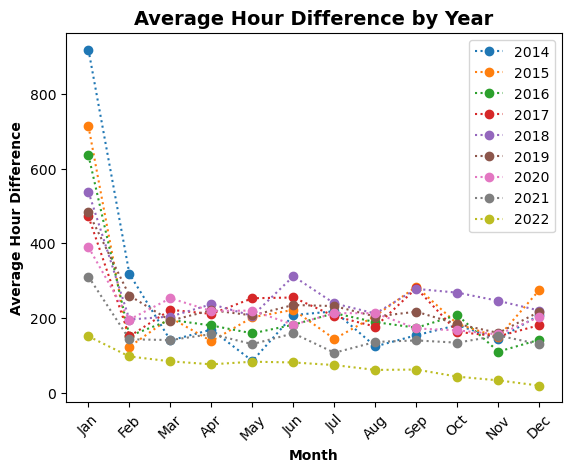

In [49]:

fig, ax = plt.subplots()

# Define years for iteration
years = list(range(2014, 2023)) 

for year in years:
    col_name = f'HOUR_DIFF_{year}'
    ax.plot(hour_diff_df['MONTH'], hour_diff_df[col_name], label=str(year), marker='o', linestyle=':')

ax.set_xlabel('Month', fontdict={'weight': 700})
ax.set_ylabel('Average Hour Difference', fontdict={'weight': 700})
ax.set_title('Average Hour Difference by Year', fontdict={'weight': 700, 'size': 14})


ax.set_xticks(np.arange(12))
ax.set_xticklabels([m[0:3] for m in hour_diff_df['MONTH']])

ax.legend()
plt.xticks(rotation=45)
plt.show()



In [42]:
# Create a new dataframe with the month and day difference for 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, and 2022
day_diff_df = pd.DataFrame(columns=['MONTH', 'DAY_DIFF_2014', 'DAY_DIFF_2015', 'DAY_DIFF_2016', 'DAY_DIFF_2017', 'DAY_DIFF_2018', 'DAY_DIFF_2019', 'DAY_DIFF_2020', 'DAY_DIFF_2021', 'DAY_DIFF_2022'])

# Loop through each month for each year and calculate the average day difference with no decimal places
for month in range(1, 13):
    day_diff_df.loc[month-1] = [month] + [round(sorted_df[(sorted_df['OCC_DATE'].dt.year == year) & (sorted_df['OCC_DATE'].dt.month == month)]['DAY_DIFFERENCE'].mean()) for year in range(2014, 2023)]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_diff_df['MONTH'] = month_names

# Show the dataframe
day_diff_df


,MONTH,DAY_DIFF_2014,DAY_DIFF_2015,DAY_DIFF_2016,DAY_DIFF_2017,DAY_DIFF_2018,DAY_DIFF_2019,DAY_DIFF_2020,DAY_DIFF_2021,DAY_DIFF_2022
0,January,38,30,26,20,22,20,16,13,6
1,February,13,5,6,6,8,11,8,6,4
2,March,6,8,8,9,8,8,10,6,3
3,April,7,6,7,9,10,9,9,6,3
4,May,3,8,6,10,8,8,9,5,3
5,June,8,9,7,10,13,10,7,6,3
6,July,9,6,9,8,10,9,9,4,3
7,August,5,8,8,7,9,8,9,5,2
8,September,6,12,7,11,11,9,7,6,2
9,October,7,7,8,7,11,7,7,5,2


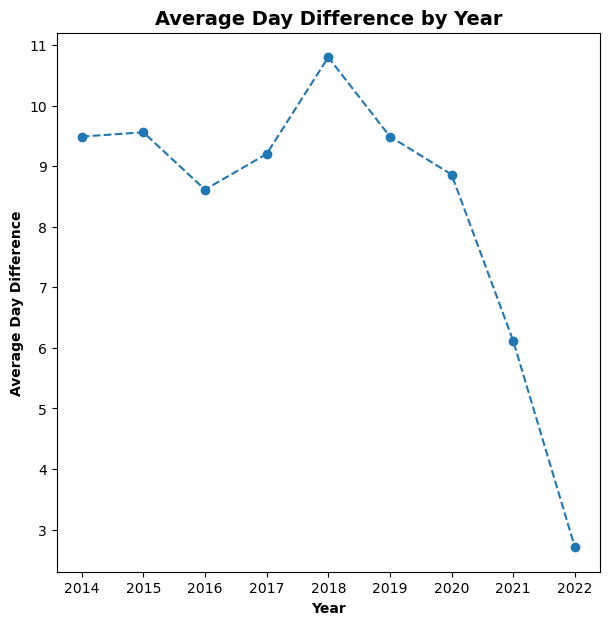

In [59]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(avg_diff_df['YEAR'], avg_diff_df['AVG_DAY_DIFF'], marker='o', linestyle='--')

ax.set_xlabel('Year', fontdict={'weight': 700})
ax.set_ylabel('Average Day Difference', fontdict={'weight': 700})
ax.set_title('Average Day Difference by Year', fontdict={'weight': 700, 'size': 14})


plt.show()

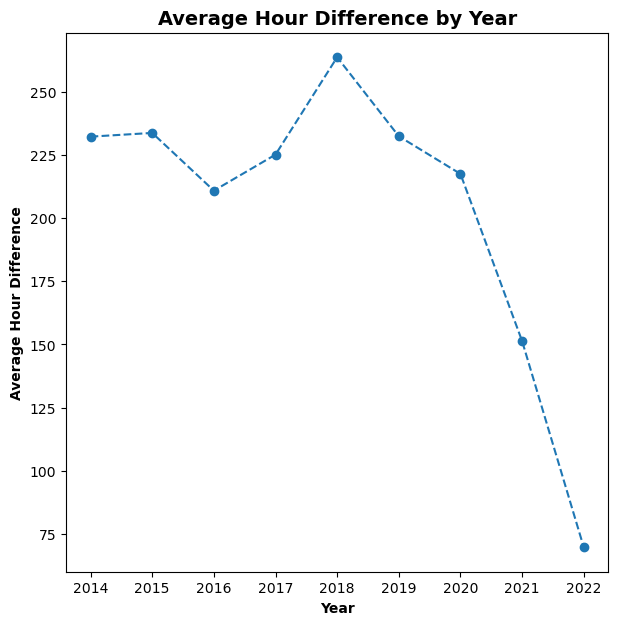

In [61]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(avg_diff_df['YEAR'], avg_diff_df['AVG_HOUR_DIFF'], marker='o', linestyle='--')

ax.set_xlabel('Year', fontdict={'weight': 700})
ax.set_ylabel('Average Hour Difference', fontdict={'weight': 700})
ax.set_title('Average Hour Difference by Year', fontdict={'weight': 700, 'size': 14})

plt.show()

